In [1]:
conda install -c conda-forge tensorflow 

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [14]:
# Here, these are necessary libraries
import tensorflow as tf
from tensorflow import keras
import cv2

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC

from sklearn import svm

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.utils import resample

%matplotlib inline



In [15]:
#Secondly I'm splitting data to train-test
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
#As we can see we have 50000 train rgb image
x_train.shape

(50000, 32, 32, 3)

In [5]:
#Also we have 10000 test rgb image
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [21]:
#Under this line there is analysis of data with two graphs first is random second is class by class

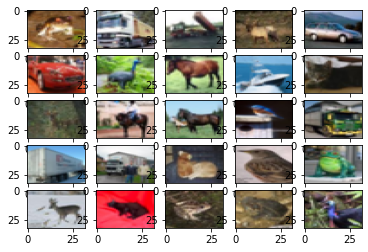

In [8]:
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

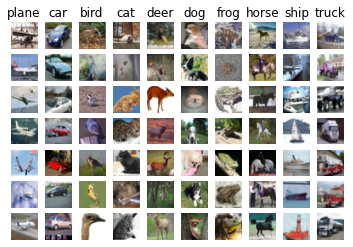

In [9]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [23]:
#Under this line there is a preprocessing part that contains changin shape from 4d to 2d and after that applying standart scaler.
#After that I applied pca to make the models fitting time decrease. 

In [10]:
nsamples, nx, ny, nrgb = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny*nrgb))

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [13]:
# Fit KNN classifier to the training data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_pca, y_train.ravel())

# Use 10-fold cross-validation to compute the metrics
y_pred = cross_val_predict(knn, x_train_pca, y_train.ravel(), cv=10)
y_train_flat = y_train.ravel() 
acc = accuracy_score(y_train_flat, y_pred)
precision = precision_score(y_train_flat, y_pred, average='weighted')
recall = recall_score(y_train_flat, y_pred, average='weighted')
f1 = f1_score(y_train_flat, y_pred, average='weighted')
cm = confusion_matrix(y_train_flat, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 score: {:.2f}%".format(f1*100))
print("Confusion matrix:")
print(cm)

Accuracy: 37.25%
Precision: 37.78%
Recall: 37.25%
F1 score: 37.20%
Confusion matrix:
[[2373  201  465  150  331  136  201  174  753  216]
 [ 394 1823  205  226  299  190  371  235  583  674]
 [ 417   96 1641  365  839  340  663  321  204  114]
 [ 218  178  595 1180  514  765  795  368  177  210]
 [ 319   95  789  336 1765  290  693  426  164  123]
 [ 194  130  542  777  529 1434  675  396  186  137]
 [ 163  141  654  415  674  339 2169  223  101  121]
 [ 309  153  476  352  625  345  419 1936  149  236]
 [ 799  360  209  175  201  149  112  139 2561  295]
 [ 432  675  230  244  260  204  340  303  569 1743]]


In [24]:
#I applied downsampling before svm model becasuse svm model took too time when i did not apply. 

In [15]:
np.random.seed(42)
n_samples = int(0.1 * x_train.shape[0])
indices = np.random.choice(x_train.shape[0], n_samples, replace=False)
x_train = x_train[indices]
y_train = y_train[indices]

In [16]:
nsamples, nx, ny, nrgb = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny*nrgb))

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [19]:
svm = SVC()
parameters = {'kernel': ['linear'],
              'C': [1],
              'gamma': [1]}

clf = GridSearchCV(svm, parameters, cv=10, scoring='accuracy')
clf.fit(x_train_pca, y_train.ravel())

print("Best parameters: ", clf.best_params_)
print("Best score: ", clf.best_score_)

Best parameters:  {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best score:  0.3094


In [20]:
y_train = y_train.ravel() 

best_svm = clf.best_estimator_
best_svm.fit(x_train_pca, y_train)

# Use the classifier to make predictions on the training data
y_pred = best_svm.predict(x_train_pca)

# Compute the metrics
acc = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')
cm = confusion_matrix(y_train, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 score: {:.2f}%".format(f1*100))
print("Confusion matrix:")
print(cm)

Accuracy: 32.28%
Precision: 32.27%
Recall: 32.28%
F1 score: 31.63%
Confusion matrix:
[[180  33  30  17  15  16  11  20 107  47]
 [ 24 147  19  24  32   6  50   9  55 121]
 [ 46  33 127  41  76  35  91  27  31  20]
 [ 17  33  63  94  66  88  80  34  17  31]
 [ 22  30  63  58 132  15 111  17  22  16]
 [ 16  31  55  70  57 146  67  21  23  18]
 [  7  32  39  49  48  30 217  29   4  30]
 [ 16  34  45  47 102  23  68  84  30  60]
 [ 57  43  15  24   8  22   6   4 266  58]
 [ 25  64  24  10  19   6  42  14  75 221]]


In [25]:
#In neural network I only made /255.0 operation to take values in interval 0-1

In [16]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# Define model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=x_train.shape[1:]),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define cross-validation
model.fit(x_train, y_train, epochs=25, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Epoch 1/25
391/391 [==============================] - 8s 19ms/step - loss: 1.8794 - accuracy: 0.3197 - val_loss: 1.7264 - val_accuracy: 0.3810
Epoch 2/25
391/391 [==============================] - 6s 16ms/step - loss: 1.6933 - accuracy: 0.3926 - val_loss: 1.7318 - val_accuracy: 0.3706
Epoch 3/25
391/391 [==============================] - 6s 16ms/step - loss: 1.6002 - accuracy: 0.4268 - val_loss: 1.6059 - val_accuracy: 0.4184
Epoch 4/25
391/391 [==============================] - 6s 16ms/step - loss: 1.5380 - accuracy: 0.4510 - val_loss: 1.5202 - val_accuracy: 0.4600
Epoch 5/25
391/391 [==============================] - 6s 16ms/step - loss: 1.4931 - accuracy: 0.4667 - val_loss: 1.5375 - val_accuracy: 0.4497
Epoch 6/25
391/391 [==============================] - 6s 15ms/step - loss: 1.4540 - accuracy: 0.4794 - val_loss: 1.4947 - val_accuracy: 0.4710
Epoch 7/25
391/391 [==============================] - 6s 15ms/step - loss: 1.4218 - accuracy: 0.4944 - val_loss: 1.4786 - val_accuracy: 0.4703

In [17]:
# Define model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=x_train.shape[1:]),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define cross-validation
model.fit(x_train, y_train, epochs=25, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Epoch 1/25
391/391 [==============================] - 7s 16ms/step - loss: 1.9891 - accuracy: 0.2888 - val_loss: 1.8778 - val_accuracy: 0.3301
Epoch 2/25
391/391 [==============================] - 5s 14ms/step - loss: 1.8152 - accuracy: 0.3598 - val_loss: 1.8071 - val_accuracy: 0.3536
Epoch 3/25
391/391 [==============================] - 5s 14ms/step - loss: 1.7374 - accuracy: 0.3891 - val_loss: 1.7659 - val_accuracy: 0.3687
Epoch 4/25
391/391 [==============================] - 6s 15ms/step - loss: 1.6827 - accuracy: 0.4081 - val_loss: 1.6560 - val_accuracy: 0.4216
Epoch 5/25
391/391 [==============================] - 5s 13ms/step - loss: 1.6397 - accuracy: 0.4223 - val_loss: 1.6100 - val_accuracy: 0.4261
Epoch 6/25
391/391 [==============================] - 5s 13ms/step - loss: 1.6037 - accuracy: 0.4349 - val_loss: 1.6549 - val_accuracy: 0.4182
Epoch 7/25
391/391 [==============================] - 5s 13ms/step - loss: 1.5758 - accuracy: 0.4439 - val_loss: 1.5819 - val_accuracy: 0.4359

In [18]:
# Define model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=x_train.shape[1:]),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define cross-validation
model.fit(x_train, y_train, epochs=25, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Epoch 1/25
391/391 [==============================] - 8s 19ms/step - loss: 2.3128 - accuracy: 0.1402 - val_loss: 2.2570 - val_accuracy: 0.1752
Epoch 2/25
391/391 [==============================] - 7s 18ms/step - loss: 2.2270 - accuracy: 0.2133 - val_loss: 2.1965 - val_accuracy: 0.2351
Epoch 3/25
391/391 [==============================] - 7s 18ms/step - loss: 2.1705 - accuracy: 0.2486 - val_loss: 2.1447 - val_accuracy: 0.2579
Epoch 4/25
391/391 [==============================] - 7s 17ms/step - loss: 2.1226 - accuracy: 0.2662 - val_loss: 2.1022 - val_accuracy: 0.2755
Epoch 5/25
391/391 [==============================] - 7s 18ms/step - loss: 2.0850 - accuracy: 0.2784 - val_loss: 2.0690 - val_accuracy: 0.2894
Epoch 6/25
391/391 [==============================] - 7s 18ms/step - loss: 2.0547 - accuracy: 0.2874 - val_loss: 2.0413 - val_accuracy: 0.2967
Epoch 7/25
391/391 [==============================] - 7s 18ms/step - loss: 2.0292 - accuracy: 0.2962 - val_loss: 2.0178 - val_accuracy: 0.2996

In [19]:
# Define model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=x_train.shape[1:]),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define cross-validation
model.fit(x_train, y_train, epochs=25, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Epoch 1/25
391/391 [==============================] - 14s 34ms/step - loss: 1.9212 - accuracy: 0.3117 - val_loss: 1.7103 - val_accuracy: 0.3907
Epoch 2/25
391/391 [==============================] - 14s 37ms/step - loss: 1.6859 - accuracy: 0.3943 - val_loss: 1.6244 - val_accuracy: 0.4150
Epoch 3/25
391/391 [==============================] - 13s 33ms/step - loss: 1.6037 - accuracy: 0.4256 - val_loss: 1.5868 - val_accuracy: 0.4371
Epoch 4/25
391/391 [==============================] - 13s 34ms/step - loss: 1.5235 - accuracy: 0.4553 - val_loss: 1.4985 - val_accuracy: 0.4612
Epoch 5/25
391/391 [==============================] - 13s 33ms/step - loss: 1.4823 - accuracy: 0.4688 - val_loss: 1.4910 - val_accuracy: 0.4680
Epoch 6/25
391/391 [==============================] - 13s 33ms/step - loss: 1.4478 - accuracy: 0.4835 - val_loss: 1.4521 - val_accuracy: 0.4842
Epoch 7/25
391/391 [==============================] - 13s 33ms/step - loss: 1.4031 - accuracy: 0.5003 - val_loss: 1.4276 - val_accuracy: